In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from collections import Counter

In [2]:
def confidance_score(probabilities_lists):
    # Convert the list of lists to a NumPy array
    probabilities_array = np.array(probabilities_lists)

    # Sort each row in descending order
    sorted_array = np.sort(probabilities_array, axis=1)[:, ::-1]
    #print(len(sorted_array))
    # Calculate the difference between the max and second max in each row
    differences = sorted_array[:, 0] - sorted_array[:, 1]
    #print(len(differences))
    print(len(differences))
    # Sum up the differences
    total_difference_sum = np.sum(differences)

    print("Sum of differences between max and second max probabilities:", total_difference_sum/len(probabilities_lists))

In [3]:
def count_predictions_per_image(unique_image):
    majority_correct = 0
    minority_correct = 0
    wrong = 0
    majority_id_lst = []

    # Iterating over each group
    for image_id, group in unique_image:
        
        labels = group['Label'].tolist()
        predictions = group['Predicted Label'].tolist()

        label_counts = Counter(labels)

        majority_label_count = max(label_counts.values(), default=0)

        unique_labels = set(labels)
        
        if majority_label_count > 1:  # If there is a majority label
            majority_label = label_counts.most_common(1)[0][0] # get the majority label
            if predictions == [majority_label] * len(predictions): # compare it with the predictions
                majority_correct += 1
                majority_id_lst.append(image_id)
            # calculate the minority
            elif all(pred in unique_labels for pred in predictions):# if the predicted labels equal one of the generated label
                minority_correct += 1
            else:
                wrong += 1

        elif all(pred in unique_labels for pred in predictions):# the case of no agreement and no majority
            minority_correct += 1
            
        else:
            wrong += 1
    
    return majority_correct, minority_correct, wrong, majority_id_lst

In [4]:
no_train = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_uniform_labels/no_train_data.csv')
no_val = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_uniform_labels/no_validation_data.csv')
no_test = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_uniform_labels/no_test_data.csv')

In [5]:
test_full_true = pd.read_csv("/home/aalmansour/source/lidc_slices/MNIST/four_raters_uniform_labels/full_test_data.csv")
test_high_true = pd.read_csv("/home/aalmansour/source/lidc_slices/MNIST/four_raters_uniform_labels/high_test_data.csv")
test_low_true = pd.read_csv("/home/aalmansour/source/lidc_slices/MNIST/four_raters_uniform_labels/low_test_data.csv")
test_no_true = pd.read_csv("/home/aalmansour/source/lidc_slices/MNIST/four_raters_uniform_labels/no_test_data.csv")
print(len(test_full_true))
print(len(test_high_true))
print(len(test_low_true))
print(len(test_no_true))

9000
9000
9000
9000


In [6]:
test_full = pd.read_csv("/home/aalmansour/source/lidc_slices/MNIST/four_raters_uniform_labels/seperate_agreement/full_agreement_model/full_probability_results/test_predictions.csv")
test_high = pd.read_csv("/home/aalmansour/source/lidc_slices/MNIST/four_raters_uniform_labels/seperate_agreement/high_agreement_model/high_probability_results/test_predictions.csv")
test_low = pd.read_csv("/home/aalmansour/source/lidc_slices/MNIST/four_raters_uniform_labels/seperate_agreement/low_agreement_model/low_probability_results/test_predictions.csv")
#test_no = pd.read_csv("/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/seperate_agreement/no_agreement_model/no_probability_results/test_predictions.csv")
test_no = pd.read_csv("/home/aalmansour/source/lidc_slices/MNIST/four_raters_uniform_labels/seperate_agreement/no_agreement_model/no_probability_results/test_predictions.csv")
print(len(test_full))
print(len(test_high))
print(len(test_low))
print(len(test_no))

9000
9000
9000
9000


In [7]:
display(test_no_true)

,image_id,flattened_image,agreement,Label,instance_id
0,45010,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,180010
1,45011,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,3,180011
2,45024,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,4,180024
3,45032,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,3,180032
4,45034,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,8,180034
...,...,...,...,...,...
8995,59954,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,239954
8996,59957,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,6,239957
8997,59976,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,5,239976
8998,59991,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,4,239991


In [8]:
# Number of classes
n_classes = 10

full= test_full.merge(test_full_true[['Label','instance_id', 'image_id']], on='instance_id')
high= test_high.merge(test_high_true[['Label','instance_id', 'image_id']], on='instance_id')
low= test_low.merge(test_low_true[['Label','instance_id', 'image_id']], on='instance_id')
no= test_no.merge(test_no_true[['Label','instance_id', 'image_id']], on='instance_id')

print(len(full))
print(len(high))
print(len(low))
print(len(no))

9000
9000
9000
9000


In [9]:
display(no)

,instance_id,Predicted Label,probability,Label,image_id
0,194954,9,"[0.17117518186569214, 0.04507071524858475, 0.1...",9,59954
1,231680,7,"[0.03066851757466793, 0.11553944647312164, 0.0...",3,51680
2,211498,2,"[0.00045153405517339706, 0.007216848898679018,...",3,46498
3,219925,1,"[0.120954230427742, 0.15045301616191864, 0.125...",2,54925
4,212776,4,"[0.1991816610097885, 0.09544777125120163, 0.01...",4,47776
...,...,...,...,...,...
8995,236621,0,"[0.4028427004814148, 0.007233145646750927, 0.0...",7,56621
8996,187733,3,"[2.4837592052517898e-11, 0.0001450895651942119...",5,52733
8997,203809,6,"[0.05203007534146309, 0.039136093109846115, 0....",6,53809
8998,220302,8,"[0.04351348802447319, 0.04011388123035431, 0.1...",0,55302


In [10]:
unique_image_full = full.groupby('image_id')
print(len(unique_image_full))
majority_correct, minority_correct, wrong, img_ids = count_predictions_per_image(unique_image_full)
print(f"Majority correct: {majority_correct}")
print(f"Minority correct: {minority_correct}")
print(f"Wrong: {wrong}")
print(majority_correct+minority_correct+wrong)

2250
Majority correct: 2190
Minority correct: 0
Wrong: 60
2250


In [11]:
# Filter the DataFrame
filtered_df = full[full['image_id'].isin(img_ids)]
probs = np.array(filtered_df['probability'])
# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

confidance_score(probabilities_lists)

8760
Sum of differences between max and second max probabilities: 0.9993568766456766


In [12]:
unique_image_high = high.groupby('image_id')
print(len(unique_image_high))
majority_correct, minority_correct, wrong, img_ids = count_predictions_per_image(unique_image_high)
print(f"Majority correct: {majority_correct}")
print(f"Minority correct: {minority_correct}")
print(f"Wrong: {wrong}")
print(majority_correct+minority_correct+wrong)

2250
Majority correct: 1886
Minority correct: 44
Wrong: 320
2250


In [13]:
# Filter the DataFrame
filtered_df = high[high['image_id'].isin(img_ids)]
probs = np.array(filtered_df['probability'])
# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

confidance_score(probabilities_lists)

7544
Sum of differences between max and second max probabilities: 0.5984136923524156


In [14]:
unique_image_low = low.groupby('image_id')
print(len(unique_image_low))
majority_correct, minority_correct, wrong, img_ids = count_predictions_per_image(unique_image_low)
print(f"Majority correct: {majority_correct}")
print(f"Minority correct: {minority_correct}")
print(f"Wrong: {wrong}")
print(majority_correct+minority_correct+wrong)

2250
Majority correct: 1691
Minority correct: 118
Wrong: 441
2250


In [15]:
# Filter the DataFrame
filtered_df = low[low['image_id'].isin(img_ids)]
probs = np.array(filtered_df['probability'])
# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

confidance_score(probabilities_lists)

6764
Sum of differences between max and second max probabilities: 0.35536063646513744


In [16]:
unique_image_no = no.groupby('image_id')
print(len(unique_image_no))
majority_correct, minority_correct, wrong,  img_ids = count_predictions_per_image(unique_image_no)
print(f"Majority correct: {majority_correct}")
print(f"Minority correct: {minority_correct}")
print(f"Wrong: {wrong}")
print(majority_correct+minority_correct+wrong)

2250
Majority correct: 0
Minority correct: 1387
Wrong: 863
2250


In [17]:
"""
test_no= no
test_no
# Create a boolean mask to filter rows
mask = test_no['Label_x'] != test_no['Predicted Label']

# Use the mask to select rows where the labels are different
different_labels_data = test_no[mask]
different_labels_data
print(len(different_labels_data['image_id'].unique()))
print(different_labels_data['image_id'].value_counts())

def count_disagreements(group):
  if group['Predicted Label'].eq(group['Predicted Label'].iloc[0]).all() == False:
    print(group['Predicted Label'])
   

different_labels_per_image = test_no.groupby('image_id').apply(count_disagreements)

# Print the results
print(different_labels_per_image)
display(different_labels_data)
different_labels_data[different_labels_data['image_id']==48379]
test_no[test_no['image_id']==45034]
"""

"\ntest_no= no\ntest_no\n# Create a boolean mask to filter rows\nmask = test_no['Label_x'] != test_no['Predicted Label']\n\n# Use the mask to select rows where the labels are different\ndifferent_labels_data = test_no[mask]\ndifferent_labels_data\nprint(len(different_labels_data['image_id'].unique()))\nprint(different_labels_data['image_id'].value_counts())\n\ndef count_disagreements(group):\n  if group['Predicted Label'].eq(group['Predicted Label'].iloc[0]).all() == False:\n    print(group['Predicted Label'])\n   \n\ndifferent_labels_per_image = test_no.groupby('image_id').apply(count_disagreements)\n\n# Print the results\nprint(different_labels_per_image)\ndisplay(different_labels_data)\ndifferent_labels_data[different_labels_data['image_id']==48379]\ntest_no[test_no['image_id']==45034]\n"

In [18]:
# Example true labels
true_labels = np.array(full['Label'])

# Example predicted probabilities
probs = np.array(full['probability'])

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))
#print(true_labels_bin)
#true_labels_bin[:, 0]

In [19]:
# The predicted probabilities
#probs = np.array(test_df['probability'])

# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

# Convert the list of lists to a numpy array
probs = np.array(probabilities_lists)

# Now you can access individual probabilities
#print(probs)

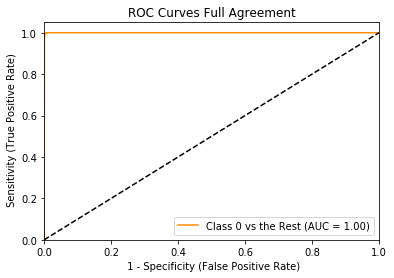

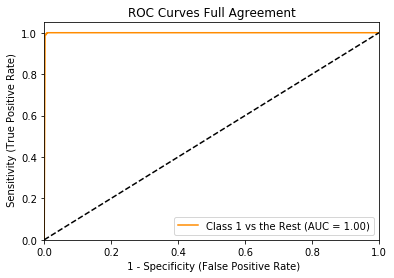

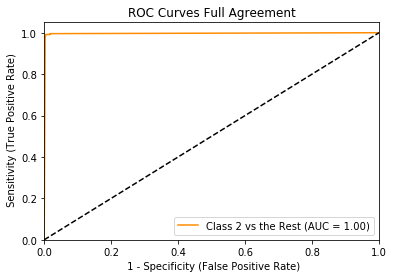

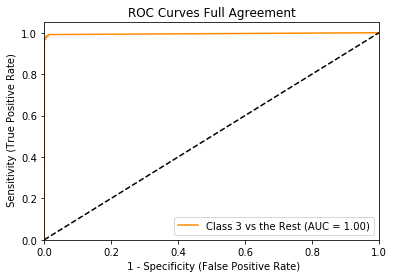

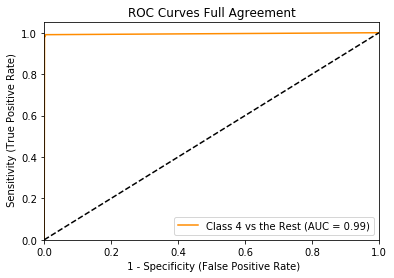

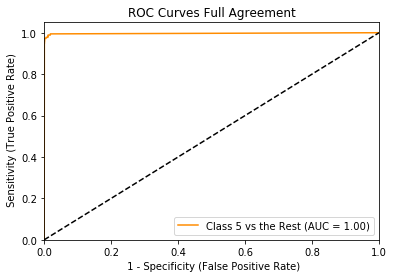

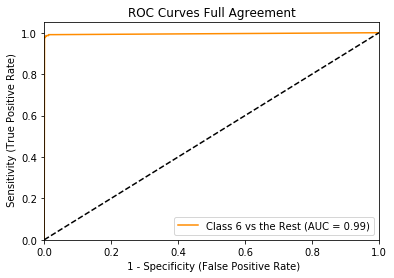

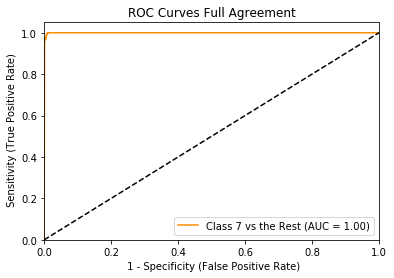

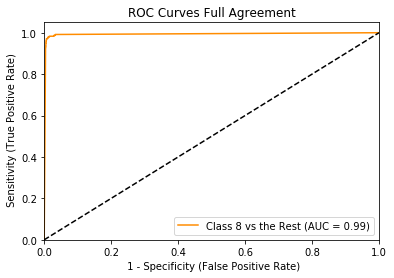

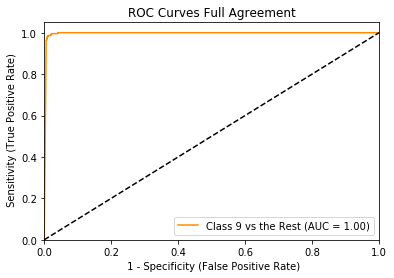

In [20]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
#plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='darkorange', label=f'Class {i} vs the Rest (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(' 1 - Specificity (False Positive Rate)')
    plt.ylabel(' Sensitivity (True Positive Rate)')
    plt.title('ROC Curves Full Agreement')
    plt.legend(loc="lower right")
    plt.show()

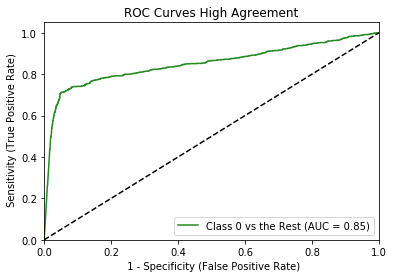

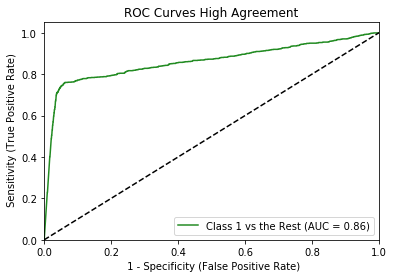

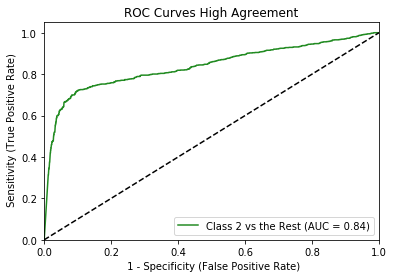

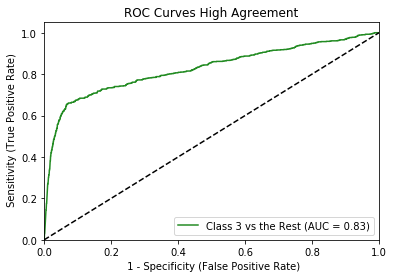

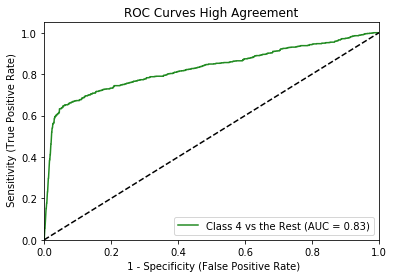

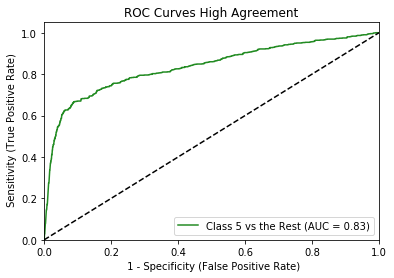

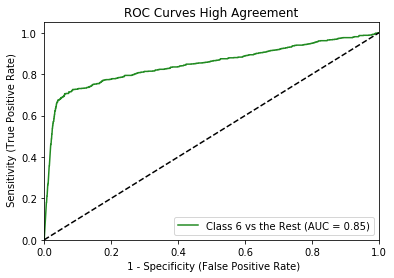

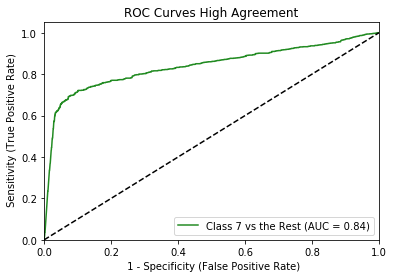

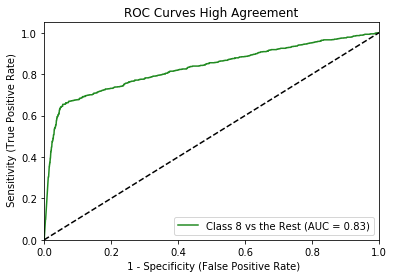

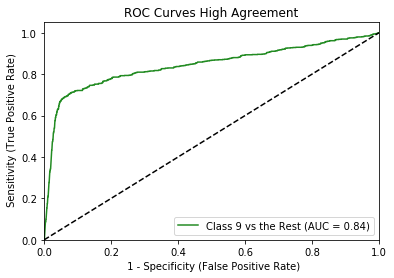

In [21]:
# The true labels
true_labels = np.array(high['Label'])

# The predicted probabilities
probs = np.array(high['probability'])

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))
true_labels_bin[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

# Convert the list of lists to a numpy array
probs = np.array(probabilities_lists)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
#plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color= 'forestgreen', label=f'Class {i} vs the Rest (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(' 1 - Specificity (False Positive Rate)')
    plt.ylabel(' Sensitivity (True Positive Rate)')
    plt.title('ROC Curves High Agreement')
    plt.legend(loc="lower right")
    plt.show()

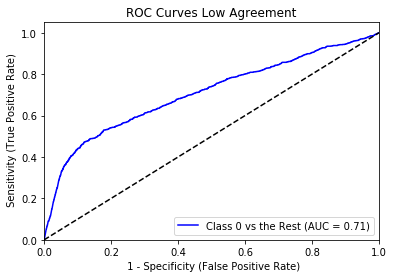

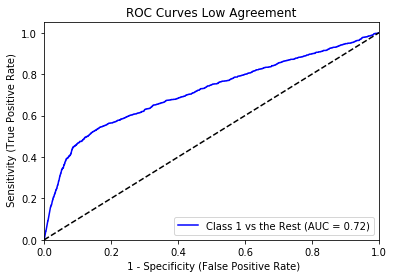

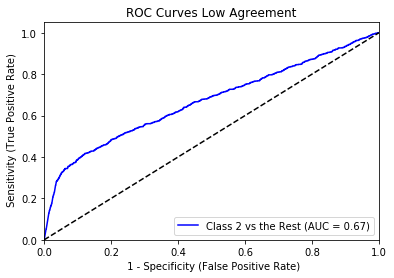

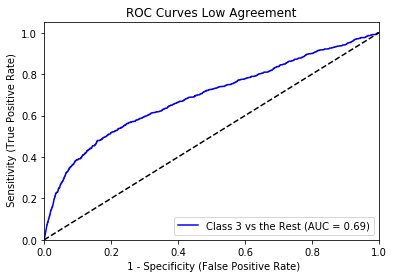

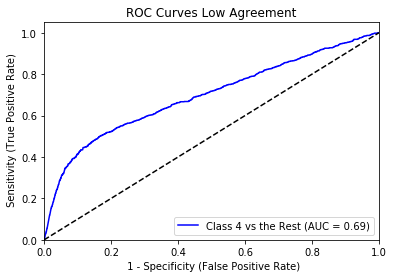

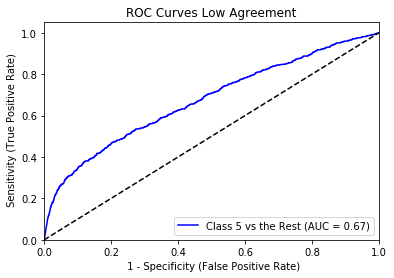

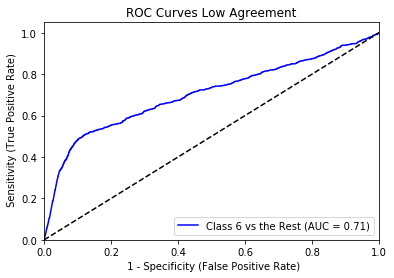

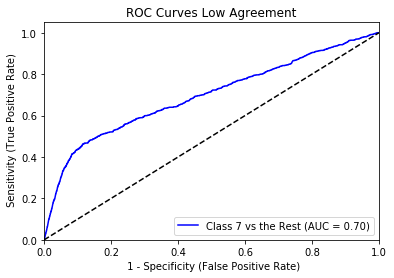

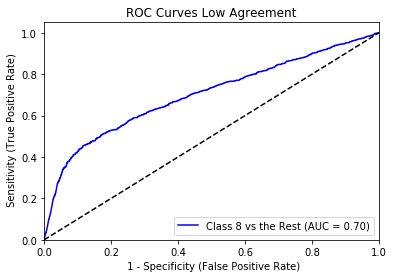

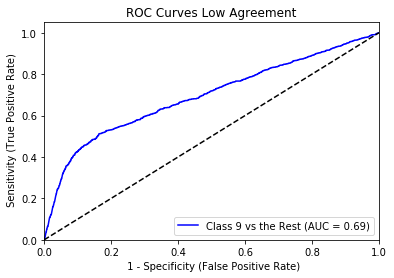

In [22]:
# The true labels
true_labels = np.array(low['Label'])

# The predicted probabilities
probs = np.array(low['probability'])

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))
#print(true_labels_bin)
true_labels_bin[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

# Convert the list of lists to a numpy array
probs = np.array(probabilities_lists)

# Now you can access individual probabilities
#print(probs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
#plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='blue' , label=f'Class {i} vs the Rest (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(' 1 - Specificity (False Positive Rate)')
    plt.ylabel(' Sensitivity (True Positive Rate)')
    plt.title('ROC Curves Low Agreement')
    plt.legend(loc="lower right")
    plt.show()

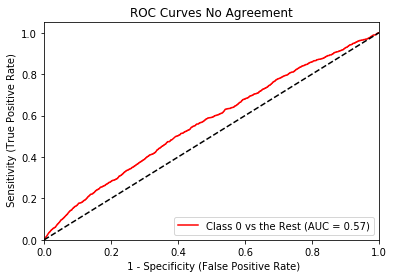

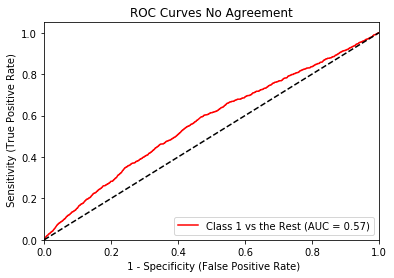

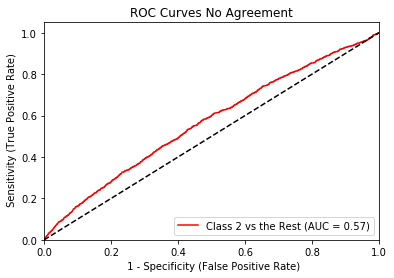

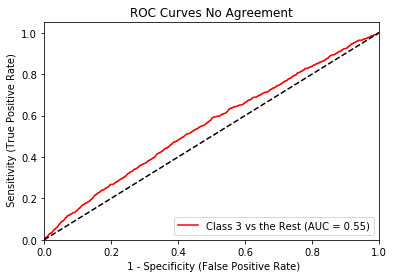

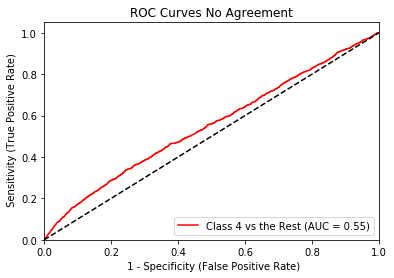

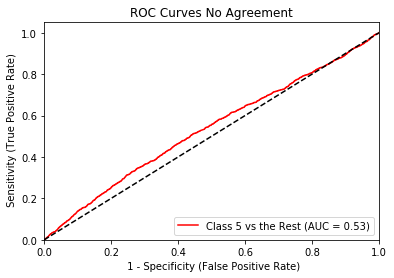

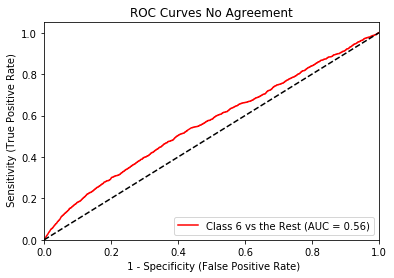

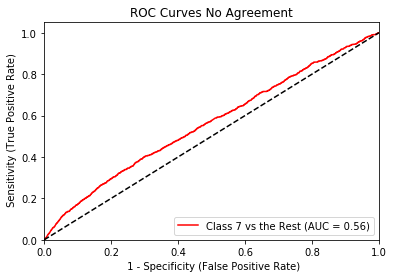

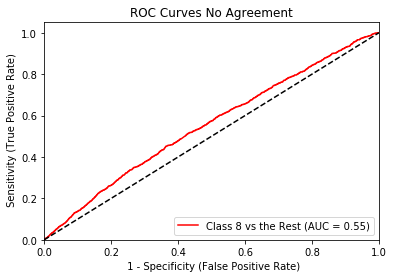

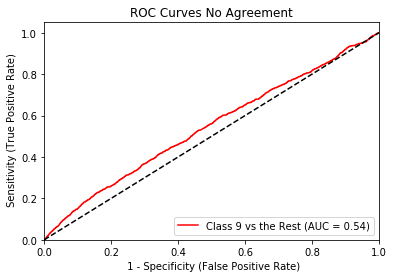

In [23]:
# The true labels
true_labels = np.array(no['Label'])

# The predicted probabilities
probs = np.array(no['probability'])

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))
#print(true_labels_bin)
true_labels_bin[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

# Convert the list of lists to a numpy array
probs = np.array(probabilities_lists)

# Now you can access individual probabilities
#print(probs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
#plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='red', label=f'Class {i} vs the Rest (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(' 1 - Specificity (False Positive Rate)')
    plt.ylabel(' Sensitivity (True Positive Rate)')
    plt.title('ROC Curves No Agreement')
    plt.legend(loc="lower right")
    plt.show()

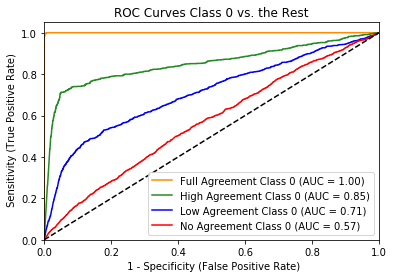

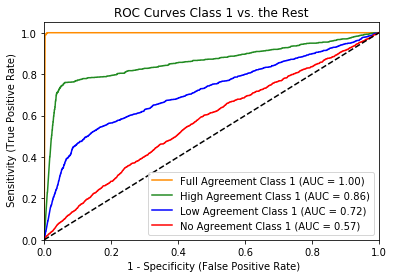

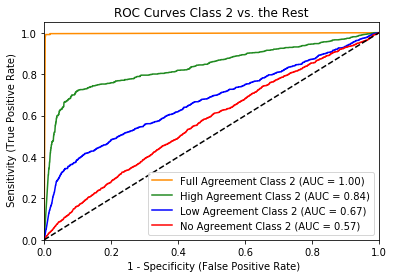

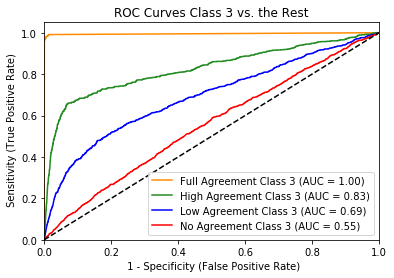

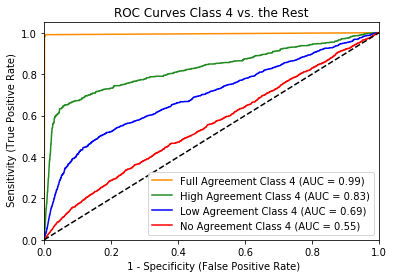

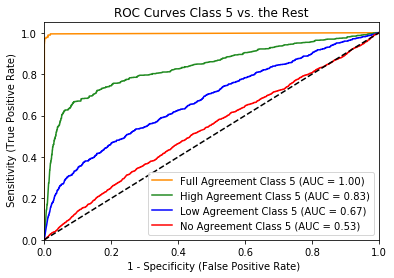

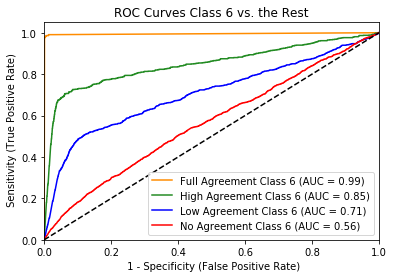

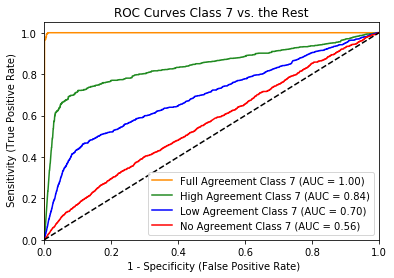

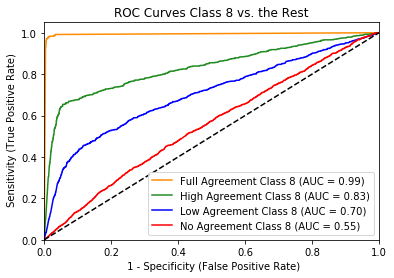

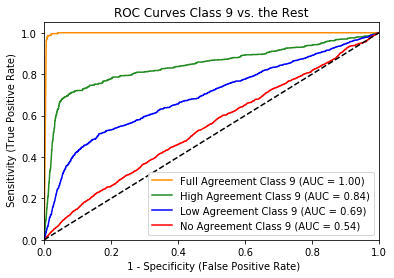

In [24]:
# The true labels
true_labels_full = np.array(full['Label'])

# The predicted probabilities
probs_full = np.array(full['probability'])

# Binarize the true labels
true_labels_bin_full = label_binarize(true_labels_full, classes=np.arange(n_classes))
true_labels_bin_full[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists_full = []
for prob_str in probs_full:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists_full.append(prob_list)

# Convert the list of lists to a numpy array
probs_full = np.array(probabilities_lists_full)

# Compute ROC curve and ROC area for each class
fpr_full = dict()
tpr_full = dict()
roc_auc_full = dict()
for i in range(n_classes):
    fpr_full[i], tpr_full[i], _ = roc_curve(true_labels_bin_full[:, i], probs_full[:, i])
    roc_auc_full[i] = auc(fpr_full[i], tpr_full[i])

#######################################################################################################

# The true labels
true_labels_high = np.array(high['Label'])

# The predicted probabilities
probs_high = np.array(high['probability'])

# Binarize the true labels
true_labels_bin_high = label_binarize(true_labels_high, classes=np.arange(n_classes))
true_labels_bin_high[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists_high = []
for prob_str in probs_high:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists_high.append(prob_list)

# Convert the list of lists to a numpy array
probs_high = np.array(probabilities_lists_high)

# Compute ROC curve and ROC area for each class
fpr_high = dict()
tpr_high = dict()
roc_auc_high = dict()
for i in range(n_classes):
    fpr_high[i], tpr_high[i], _ = roc_curve(true_labels_bin_high[:, i], probs_high[:, i])
    roc_auc_high[i] = auc(fpr_high[i], tpr_high[i])

#######################################################################################################

# The true labels
true_labels_low = np.array(low['Label'])

# The predicted probabilities
probs_low = np.array(low['probability'])

# Binarize the true labels
true_labels_bin_low = label_binarize(true_labels_low, classes=np.arange(n_classes))
#print(true_labels_bin)
true_labels_bin_low[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists_low = []
for prob_str in probs_low:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists_low.append(prob_list)

# Convert the list of lists to a numpy array
probs_low = np.array(probabilities_lists_low)

# Now you can access individual probabilities
#print(probs)

# Compute ROC curve and ROC area for each class
fpr_low = dict()
tpr_low = dict()
roc_auc_low = dict()
for i in range(n_classes):
    fpr_low[i], tpr_low[i], _ = roc_curve(true_labels_bin_low[:, i], probs_low[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])

################################################################################################

# The true labels
true_labels_no = np.array(no['Label'])

# The predicted probabilities
probs_no = np.array(no['probability'])

# Binarize the true labels
true_labels_bin_no = label_binarize(true_labels_no, classes=np.arange(n_classes))
#print(true_labels_bin)
true_labels_bin_no[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists_no = []
for prob_str in probs_no:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists_no.append(prob_list)

# Convert the list of lists to a numpy array
probs_no1 = np.array(probabilities_lists_no)

# Now you can access individual probabilities
#print(probs)

# Compute ROC curve and ROC area for each class
fpr_no = dict()
tpr_no = dict()
roc_auc_no = dict()
for i in range(n_classes):
    fpr_no[i], tpr_no[i], _ = roc_curve(true_labels_bin_no[:, i], probs_no1[:, i])
    roc_auc_no[i] = auc(fpr_no[i], tpr_no[i])

################################################################################################
    
# Plot ROC curves
#plt.figure(figsize=(8, 6))
for i in range(n_classes):
    
    plt.plot(fpr_full[i], tpr_full[i], color='darkorange', label=f'Full Agreement Class {i} (AUC = {roc_auc_full[i]:.2f})')
    plt.plot(fpr_high[i], tpr_high[i], color= 'forestgreen', label=f'High Agreement Class {i} (AUC = {roc_auc_high[i]:.2f})')
    plt.plot(fpr_low[i], tpr_low[i], color='blue', label=f'Low Agreement Class {i} (AUC = {roc_auc_low[i]:.2f})')
    plt.plot(fpr_no[i], tpr_no[i], color='red', label=f'No Agreement Class {i} (AUC = {roc_auc_no[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel(' 1 - Specificity (False Positive Rate)')
    plt.ylabel(' Sensitivity (True Positive Rate)')
    plt.title(f'ROC Curves Class {i} vs. the Rest')
    plt.legend(loc="lower right")
    plt.show()

In [25]:
confidance_score(probabilities_lists_full)
confidance_score(probabilities_lists_high)
confidance_score(probabilities_lists_low)
confidance_score(probabilities_lists_no)

9000
Sum of differences between max and second max probabilities: 0.9985331600060376
9000
Sum of differences between max and second max probabilities: 0.5400963291948844
9000
Sum of differences between max and second max probabilities: 0.30792021472113995
9000
Sum of differences between max and second max probabilities: 0.09906758766127556


In [26]:
from collections import Counter

def count_predictions(label_lists, prediction_lists):
    majority_correct = 0
    minority_correct = 0
    wrong = 0
    
    for labels, predictions in zip(label_lists, prediction_lists):
        label_counts = Counter(labels)
        majority_label = label_counts.most_common(1)[0][0]
        unique_labels = set(labels)
        
        if predictions == [majority_label] * 4:
            majority_correct += 1
        elif all(pred in unique_labels for pred in predictions):
            minority_correct += 1
        else:
            wrong += 1
    
    return majority_correct, minority_correct, wrong

# Example label lists and prediction lists
label_lists = [
    [1, 1, 1, 1],
    [1, 1, 1, 2],
    [1, 1, 2, 2],
    [1, 1, 2, 3],
    [1, 2, 3, 4]
]

prediction_lists = [
    [1, 1, 1, 1],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3],
    [5, 5, 5, 5]
]

majority_correct, minority_correct, wrong = count_predictions(label_lists, prediction_lists)
print(f"Majority correct: {majority_correct}")
print(f"Minority correct: {minority_correct}")
print(f"Wrong: {wrong}")


Majority correct: 2
Minority correct: 2
Wrong: 1
